# Introduction

The main motivation of this project is predicting the NBA end of season awards for the 2022-23 season based on advanced stats. This not only adds another element to the tight race this season but could also influence sports betting, which has become extremely popular over the last few years.

In [ ]:
import pandas as pd

df_raptor = pd.read_csv('MVP Voting - All 30 Seasons.csv')
df_raptor.head()

,Year,Player,Age,Tm,G_scaled,GS_scaled,MP_scaled,FG_scaled,FGA_scaled,FG%_scaled,...,AST_scaled,STL_scaled,BLK_scaled,TOV_scaled,PF_scaled,PTS_scaled,MVP,DPOY,Sixth Man,Award
0,1992.0,Alaa Abdelnaby,23.0,POR,10.66624,0.03104,1.56837,1.13471,1.16022,11.03965,...,0.18606,0.74465,0.28255,1.20275,2.69745,1.05514,0.00,0.0,0.0,None
1,1992.0,Mahmoud Abdul-Rauf,22.0,DEN,12.16853,0.34140,2.25750,1.99708,2.36593,9.42737,...,1.11636,0.93081,0.00000,1.87094,2.27153,1.78163,0.00,0.0,0.0,None
2,1992.0,Mark Acres,29.0,ORL,10.21555,0.18622,1.61590,0.49927,0.50048,11.57707,...,0.13954,0.74465,0.28255,0.66819,2.98139,0.53622,0.00,0.0,0.0,None
3,1992.0,Michael Adams,29.0,WSB,11.71784,2.42081,4.25361,2.81407,3.59439,8.80037,...,3.53513,3.53708,0.14127,3.60824,2.98139,3.13083,0.00,0.0,0.0,None
4,1992.0,Rafael Addison,27.0,NJN,11.41738,0.24829,1.84165,1.13471,1.29671,9.69608,...,0.41863,0.74465,0.56509,0.80183,1.98759,1.00325,0.00,0.0,0.0,None


## Web Scrapper

In [ ]:
import pandas as pd
year_list = ['1992', '1993', '1994', '1995', '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004',
        '2005', '2006', '2007', '2008', '2009', '2010', '2011']

mvp_1992_to_2011_data = pd.DataFrame()
import time

for year in year_list:
    print(year)
    #get table for each year
    url = f'https://www.basketball-reference.com/leagues/NBA_{year}_per_game.html'
    tables = pd.read_html(url)
    df_year = tables[0]

    #drop 'breaks' in table that appear for some reason
    for idx in range(len(df_year)):
        if df_year.loc[idx, 'Player'] == 'Player':
            df_year.drop(labels=idx, axis=0, inplace=True)
        else:
            pass

    #need to drop ranking and position
    df_year.drop(labels='Rk',axis=1, inplace=True)
    df_year.drop(labels='Pos',axis=1, inplace=True)

    #stats that need to be turned into floats or ints
    numerics = ['G', 'GS', 'MP', 'FG', 'FGA', 'FG%',
       '3P', '3PA', '3P%', '2P', '2PA', '2P%', 'eFG%', 'FT', 'FTA', 'FT%',
       'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS']
    for col in numerics:
        df_year[col] = pd.to_numeric(df_year[col])

    #1999 season was shortened, so only need 36 games to qualify
    if year == '1999':
        df_games = df_year.loc[:, 'G']
        s_bool = df_games >= 36

        df_year_cond = df_year.loc[s_bool, :]

    #every other year need 60 games to qualify
    else:
        df_games = df_year.loc[:, 'G']
        s_bool = df_games >= 60

        df_year_cond = df_year.loc[s_bool, :]


    #add year column
    df_year_cond['Year'] = year

    #normalize data
    for feat in numerics:
        df_year_cond[feat] = df_year_cond[feat]/ df_year_cond[feat].std()
        df_year_cond.rename(columns={feat:f'{feat}_scaled'}, inplace=True)

    #if this is first year, then set equal to dataframe, if not, add to bottom
    if len(mvp_1992_to_2011_data) == 0:
        mvp_1992_to_2011_data = df_year_cond

    else:
        mvp_1992_to_2011_data = pd.concat([mvp_1992_to_2011_data, df_year_cond], axis=0)

    time.sleep(10)


1992


<ipython-input-5-df4987fad8e7>:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_year_cond['Year'] = year
<ipython-input-5-df4987fad8e7>:53: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_year_cond[feat] = df_year_cond[feat]/ df_year_cond[feat].std()
<ipython-input-5-df4987fad8e7>:54: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-vers

1993


<ipython-input-5-df4987fad8e7>:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_year_cond['Year'] = year
<ipython-input-5-df4987fad8e7>:53: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_year_cond[feat] = df_year_cond[feat]/ df_year_cond[feat].std()
<ipython-input-5-df4987fad8e7>:54: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-vers

1994


<ipython-input-5-df4987fad8e7>:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_year_cond['Year'] = year
<ipython-input-5-df4987fad8e7>:53: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_year_cond[feat] = df_year_cond[feat]/ df_year_cond[feat].std()
<ipython-input-5-df4987fad8e7>:54: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-vers

1995


<ipython-input-5-df4987fad8e7>:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_year_cond['Year'] = year
<ipython-input-5-df4987fad8e7>:53: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_year_cond[feat] = df_year_cond[feat]/ df_year_cond[feat].std()
<ipython-input-5-df4987fad8e7>:54: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-vers

1996


<ipython-input-5-df4987fad8e7>:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_year_cond['Year'] = year
<ipython-input-5-df4987fad8e7>:53: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_year_cond[feat] = df_year_cond[feat]/ df_year_cond[feat].std()
<ipython-input-5-df4987fad8e7>:54: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-vers

1997


<ipython-input-5-df4987fad8e7>:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_year_cond['Year'] = year
<ipython-input-5-df4987fad8e7>:53: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_year_cond[feat] = df_year_cond[feat]/ df_year_cond[feat].std()
<ipython-input-5-df4987fad8e7>:54: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-vers

1998


<ipython-input-5-df4987fad8e7>:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_year_cond['Year'] = year
<ipython-input-5-df4987fad8e7>:53: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_year_cond[feat] = df_year_cond[feat]/ df_year_cond[feat].std()
<ipython-input-5-df4987fad8e7>:54: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-vers

1999


<ipython-input-5-df4987fad8e7>:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_year_cond['Year'] = year
<ipython-input-5-df4987fad8e7>:53: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_year_cond[feat] = df_year_cond[feat]/ df_year_cond[feat].std()
<ipython-input-5-df4987fad8e7>:54: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-vers

2000


<ipython-input-5-df4987fad8e7>:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_year_cond['Year'] = year
<ipython-input-5-df4987fad8e7>:53: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_year_cond[feat] = df_year_cond[feat]/ df_year_cond[feat].std()
<ipython-input-5-df4987fad8e7>:54: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-vers

2001


<ipython-input-5-df4987fad8e7>:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_year_cond['Year'] = year
<ipython-input-5-df4987fad8e7>:53: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_year_cond[feat] = df_year_cond[feat]/ df_year_cond[feat].std()
<ipython-input-5-df4987fad8e7>:54: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-vers

2002


<ipython-input-5-df4987fad8e7>:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_year_cond['Year'] = year
<ipython-input-5-df4987fad8e7>:53: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_year_cond[feat] = df_year_cond[feat]/ df_year_cond[feat].std()
<ipython-input-5-df4987fad8e7>:54: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-vers

2003


<ipython-input-5-df4987fad8e7>:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_year_cond['Year'] = year
<ipython-input-5-df4987fad8e7>:53: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_year_cond[feat] = df_year_cond[feat]/ df_year_cond[feat].std()
<ipython-input-5-df4987fad8e7>:54: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-vers

2004


<ipython-input-5-df4987fad8e7>:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_year_cond['Year'] = year
<ipython-input-5-df4987fad8e7>:53: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_year_cond[feat] = df_year_cond[feat]/ df_year_cond[feat].std()
<ipython-input-5-df4987fad8e7>:54: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-vers

2005


<ipython-input-5-df4987fad8e7>:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_year_cond['Year'] = year
<ipython-input-5-df4987fad8e7>:53: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_year_cond[feat] = df_year_cond[feat]/ df_year_cond[feat].std()
<ipython-input-5-df4987fad8e7>:54: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-vers

2006


<ipython-input-5-df4987fad8e7>:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_year_cond['Year'] = year
<ipython-input-5-df4987fad8e7>:53: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_year_cond[feat] = df_year_cond[feat]/ df_year_cond[feat].std()
<ipython-input-5-df4987fad8e7>:54: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-vers

2007


<ipython-input-5-df4987fad8e7>:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_year_cond['Year'] = year
<ipython-input-5-df4987fad8e7>:53: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_year_cond[feat] = df_year_cond[feat]/ df_year_cond[feat].std()
<ipython-input-5-df4987fad8e7>:54: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-vers

2008


<ipython-input-5-df4987fad8e7>:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_year_cond['Year'] = year
<ipython-input-5-df4987fad8e7>:53: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_year_cond[feat] = df_year_cond[feat]/ df_year_cond[feat].std()
<ipython-input-5-df4987fad8e7>:54: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-vers

2009


<ipython-input-5-df4987fad8e7>:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_year_cond['Year'] = year
<ipython-input-5-df4987fad8e7>:53: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_year_cond[feat] = df_year_cond[feat]/ df_year_cond[feat].std()
<ipython-input-5-df4987fad8e7>:54: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-vers

2010


<ipython-input-5-df4987fad8e7>:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_year_cond['Year'] = year
<ipython-input-5-df4987fad8e7>:53: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_year_cond[feat] = df_year_cond[feat]/ df_year_cond[feat].std()
<ipython-input-5-df4987fad8e7>:54: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-vers

2011


<ipython-input-5-df4987fad8e7>:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_year_cond['Year'] = year
<ipython-input-5-df4987fad8e7>:53: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_year_cond[feat] = df_year_cond[feat]/ df_year_cond[feat].std()
<ipython-input-5-df4987fad8e7>:54: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-vers

In [ ]:
#export to csv
mvp_1992_to_2011_data.to_csv('1992_to_2011.csv')

## Classifier

In [ ]:
#normalizing 2023 data
import pandas as pd
import numpy as np

#import csv
df_2023 = pd.read_csv('MVP Voting - 2023.csv')

#chose the numeric numbers to normalize
cols = ['G', 'GS', 'MP', 'FG', 'FGA', 'FG%',
       '3P', '3PA', '3P%', '2P', '2PA', '2P%', 'eFG%', 'FT', 'FTA', 'FT%',
       'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS']

#normalize
for feat in cols:
    df_2023[feat] = df_2023[feat] / df_2023[feat].std()
    df_2023.rename(columns={feat:f'{feat}_scaled'}, inplace=True)

df_2023.head()

,Year,Player,Age,Tm,G_scaled,GS_scaled,MP_scaled,FG_scaled,FGA_scaled,FG%_scaled,...,FT%_scaled,ORB_scaled,DRB_scaled,TRB_scaled,AST_scaled,STL_scaled,BLK_scaled,TOV_scaled,PF_scaled,PTS_scaled
0,2023,Kyrie Irving,30,TOT,8.978394,2.145156,5.432560,4.329266,4.258918,6.869622,...,10.554832,1.287812,2.324636,2.164004,2.831982,3.253957,1.764316,2.626233,4.464957,4.139400
1,2023,Pascal Siakam,28,TOR,10.624433,2.538435,5.432560,3.891967,3.919900,6.674936,...,9.027006,2.318062,3.401906,3.309653,2.986453,2.662328,1.102698,3.001409,5.102808,3.696438
2,2023,Jayson Tatum,24,BOS,11.073352,2.645693,5.359932,4.285536,4.470805,6.480251,...,9.960030,1.416594,4.365779,3.733968,2.368566,3.253957,1.543777,3.626702,3.508180,4.597636
3,2023,Fred VanVleet,28,TOR,10.325153,2.466930,5.330881,2.754988,3.411372,5.465104,...,10.473193,0.515125,2.041144,1.739689,3.707321,5.324657,1.323237,2.501174,4.464957,2.947986
4,2023,Dejounte Murray,26,ATL,11.073352,2.645693,5.287304,3.629587,3.771579,6.452438,...,9.703448,0.901469,2.551429,2.248867,3.140925,4.437214,0.661619,2.751292,2.232478,3.131280


In [ ]:
#normalizing 2012-2022 data
years = ['2022', '2021', '2020', '2019', '2018', '2017', '2016', '2015', '2014', '2013', '2012']
cols = ['G', 'GS', 'MP', 'FG', 'FGA', 'FG%',
       '3P', '3PA', '3P%', '2P', '2PA', '2P%', 'eFG%', 'FT', 'FTA', 'FT%',
       'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS']

#initialize new dataframe
mvp_normalized_data = pd.DataFrame()

#normalize by year
for year in years:
    df_normal = pd.DataFrame()
    df_normal = pd.read_csv(f'MVP Voting - {year}.csv')

    for feat in cols:
        df_normal[feat] = df_normal[feat]/ df_normal[feat].std()
        #rename the columns
        df_normal.rename(columns={feat:f'{feat}_scaled'}, inplace=True)

    #for first year set dataframe as the data from the first year, all other years add the data to the bottom
    if year == '2022':
        mvp_normalized_data = df_normal
    else:
        mvp_normalized_data = pd.concat([mvp_normalized_data, df_normal], axis=0)

mvp_normalized_data.head()

FileNotFoundError: ignored

Cross Validation

In [ ]:
import pandas as pd
df_2023 = pd.read_csv('MVP Voting - 2023 Normalized.csv')
mvp_normalized_data = pd.read_csv('MVP Voting - All 30 Seasons.csv')

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import StratifiedKFold
from copy import copy
from sklearn.metrics import accuracy_score

k = 2
x_feat_list = ['G_scaled', 'GS_scaled', 'MP_scaled',
       'FG_scaled', 'FGA_scaled', 'FG%_scaled', '3P_scaled', '3PA_scaled',
       '3P%_scaled', '2P_scaled', '2PA_scaled', '2P%_scaled', 'eFG%_scaled',
       'FT_scaled', 'FTA_scaled', 'FT%_scaled', 'ORB_scaled', 'DRB_scaled',
       'TRB_scaled', 'AST_scaled', 'STL_scaled', 'BLK_scaled', 'TOV_scaled',
       'PF_scaled', 'PTS_scaled']

new_feat_list = ['PTS_scaled', 'AST_scaled', 'TRB_scaled', 'FG_scaled', 'GS_scaled', '2P_scaled', 'DRB_scaled', 'BLK_scaled', 'PF_scaled', 'TOV_scaled']


y_feat = 'Award'

#throw out rows with missing data
mvp_normalized_data.dropna(how='any', inplace=True)

x = mvp_normalized_data.loc[:, new_feat_list].values
y_true = mvp_normalized_data.loc[:, y_feat].values

# initialize a knn_classifier- look at k nearest neighbors
knn_classifier = KNeighborsClassifier(n_neighbors=k)

# fit happens "inplace", we modify the internal state of knn_classifier (it remembers all the training samples)
knn_classifier.fit(x, y_true)

# construction of kfold object
kfold = StratifiedKFold(n_splits=3)

# allocate an empty array to store predictions in
y_pred = copy(y_true)

#create a copy of the dataset
df_copy = copy(mvp_normalized_data)

for train_idx, test_idx in kfold.split(x, y_true):
    # build arrays which correspond to x, y train /test
    x_test = x[test_idx, :]
    x_train = x[train_idx, :]
    y_true_train = y_true[train_idx]

    # fit happens "inplace", we modify the internal state of knn_classifier to remember all the training samples
    knn_classifier.fit(x_train, y_true_train)

    # estimate each award
    y_pred[test_idx] = knn_classifier.predict(x_test)

In [ ]:
#add the predictions to copied data set
df_copy['Award Pred'] = y_pred

In [ ]:
#find the classifiers predictions
s_df = df_copy.loc[:, 'Award Pred']

s_bool = s_df != 'None'

df_copy.loc[s_bool, :]

,Year,Player,Age,Tm,G_scaled,GS_scaled,MP_scaled,FG_scaled,FGA_scaled,FG%_scaled,...,STL_scaled,BLK_scaled,TOV_scaled,PF_scaled,PTS_scaled,MVP,DPOY,Sixth Man,Award,Award Pred
427,1993,Shaquille O'Neal,20,ORL,13.23382,2.61317,4.57025,4.05174,3.57954,13.58463,...,1.35143,5.48099,5.05579,5.38204,3.97143,30,0.0,0.0,None,DPOY
1838,1999,Latrell Sprewell,28,NYK,8.14252,0.20489,3.98216,3.02800,3.31468,8.42262,...,2.38512,0.16437,2.67973,2.54928,3.17162,0,0.0,0.0,None,Sixth Man
3050,2004,Ben Wallace,29,DET,12.23609,2.68483,4.53345,1.92989,2.03872,9.62672,...,4.29721,4.72203,2.04190,3.23856,1.71697,24,325.0,0.0,None,DPOY
3602,2007,Marcus Camby,32,DEN,10.11372,2.42427,4.18000,2.18129,2.16010,8.55598,...,2.93789,5.82132,2.14742,3.93142,1.92775,0,431.0,0.0,DPOY,DPOY
3928,2008,LeBron James,23,CLE,11.67680,2.44125,4.92665,5.08796,5.01224,9.26224,...,4.40579,2.08143,4.66851,3.47522,5.10847,438,0.0,0.0,None,MVP
6153,2017,Rudy Gobert,24,UTA,12.44985,2.72349,4.91777,2.40320,1.73005,10.83055,...,1.52468,6.03035,2.22481,5.24290,2.28904,0,269.0,0.0,None,DPOY
6322,2018,Anthony Davis,24,NOP,11.64386,2.51803,5.43404,5.16982,4.64678,8.69958,...,3.67032,6.38176,2.83847,3.88344,5.00071,445,139.0,0.0,None,MVP
6575,2019,Joel Embiid,24,PHI,9.46428,2.10398,5.20956,4.20275,4.12808,7.58709,...,1.82849,4.14137,4.19027,5.52824,4.50656,49,26.0,0.0,None,MVP
6964,2020,Hassan Whiteside,30,POR,16.74216,2.27352,4.75918,2.96960,2.26725,8.97919,...,1.10310,6.04963,2.03517,5.14529,2.43515,0,3.0,0.0,None,DPOY
6980,2021,Rudy Gobert,28,UTA,12.00608,2.88251,4.61034,2.36729,1.72145,9.06206,...,1.79575,6.50938,1.97303,4.04962,2.20747,8,464.0,0.0,DPOY,DPOY


In [ ]:
df_copy.to_csv('award_pred.csv')

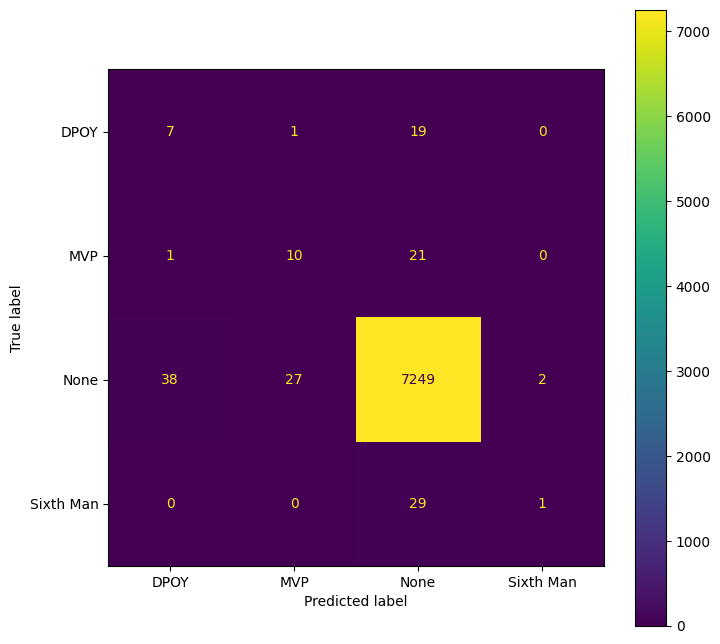

In [ ]:
#confusion matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

conf_mat = confusion_matrix(y_true=y_true, y_pred=y_pred)
conf_mat_disp = ConfusionMatrixDisplay(conf_mat, display_labels=np.unique(y_true))
conf_mat_disp.plot()

plt.gcf().set_size_inches(8, 8)

# seaborn turns on grid by default ... looks best without it
plt.grid(False)

In [ ]:
from sklearn.model_selection import StratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
import numpy as np

def get_cv_acc_knn(x, y_true, k, n_splits=5):
    """ computes cross validated accuracy of a KNN classifier

    Args:
        x (np.array): (n_sample, n_feat) features
        y (np.array): (n_sample) target variable
        k (int): number of nearest neighbors in k-NN classifier

    Returns:
        acc (float): cross validated accuracy
    """
    # initialize a knn_classifier
    knn_classifier = KNeighborsClassifier(n_neighbors=k)

    # "Stratified" ensures (roughly) same number of species across folds
    kfold = StratifiedKFold(n_splits=n_splits)

    # initialize an empty array same size & datatype as y_true
    y_pred = np.empty_like(y_true)
    for train_idx, test_idx in kfold.split(x, y_true):
        # split test / training data
        x_train = x[train_idx, :]
        x_test = x[test_idx, :]
        y_true_train = y_true[train_idx]

        # train on training data
        knn_classifier.fit(x_train, y_true_train)

        # predict on the testing data
        y_pred[test_idx] = knn_classifier.predict(x_test)

    return accuracy_score(y_true, y_pred)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import StratifiedKFold
from copy import copy

x_feat_list = ['PTS_scaled', 'AST_scaled', 'TRB_scaled', 'FG_scaled', 'GS_scaled', '2P_scaled', 'DRB_scaled', 'BLK_scaled', 'PF_scaled', 'TOV_scaled']

y_feat = 'Award'


x = mvp_normalized_data.loc[:, x_feat_list].values
y_true = mvp_normalized_data.loc[:, y_feat].values

# compute cross validated accuracy of each k
k_all = np.array(range(1, 50))
acc = np.empty(k_all.shape, dtype=float)
for idx, k in enumerate(k_all):
    acc[idx] = get_cv_acc_knn(x, y_true, k, n_splits=5)

[0.98311951 0.98082377 0.98663065 0.98636057 0.98717083 0.9867657
 0.98744092 0.98757596 0.98798109 0.98798109 0.98784605 0.98798109
 0.98811614 0.98811614 0.98798109 0.98798109 0.98798109 0.98798109
 0.98798109 0.98798109 0.98798109 0.98798109 0.98798109 0.98798109
 0.98798109 0.98798109 0.98798109 0.98798109 0.98798109 0.98798109
 0.98798109 0.98798109 0.98798109 0.98798109 0.98798109 0.98798109
 0.98798109 0.98798109 0.98798109 0.98798109 0.98798109 0.98798109
 0.98798109 0.98798109 0.98798109 0.98798109 0.98798109 0.98798109
 0.98798109]


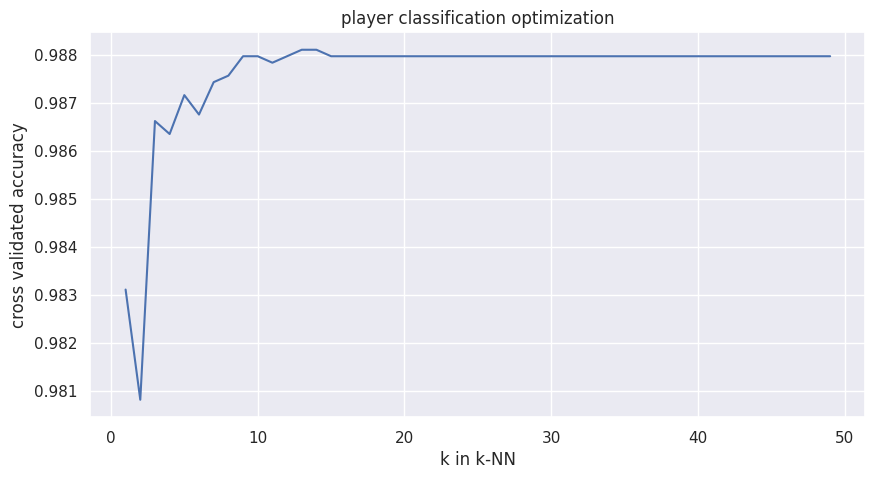

In [ ]:
plt.plot(k_all, acc)
print(acc)
plt.xlabel('k in k-NN')
plt.ylabel('cross validated accuracy')
plt.title('player classification optimization')
plt.gcf().set_size_inches(10, 5)
plt.savefig('best_k_player.png')

# Classifier Predictions

In [ ]:
import pandas as pd
df_2023 = pd.read_csv('MVP Voting - 2023 Normalized.csv')
mvp_normalized_data = pd.read_csv('MVP Voting - All 30 Seasons.csv')

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import StratifiedKFold
from copy import copy
from sklearn.neighbors import KNeighborsClassifier

#drop NaN
df_2023.dropna(axis=0, inplace=True)
mvp_normalized_data.dropna(axis=0, inplace=True)

k = 2
#feature list
x_feat_list = ['G_scaled', 'GS_scaled', 'MP_scaled',
       'FG_scaled', 'FGA_scaled', 'FG%_scaled', '3P_scaled', '3PA_scaled',
       '3P%_scaled', '2P_scaled', '2PA_scaled', '2P%_scaled', 'eFG%_scaled',
       'FT_scaled', 'FTA_scaled', 'FT%_scaled', 'ORB_scaled', 'DRB_scaled',
       'TRB_scaled', 'AST_scaled', 'BLK_scaled', 'BLK_scaled', 'TOV_scaled',
       'PF_scaled', 'PTS_scaled']

new_feat_list = ['PTS_scaled', 'AST_scaled', 'TRB_scaled', 'FG_scaled', 'GS_scaled', '2P_scaled', 'DRB_scaled', 'BLK_scaled', 'PF_scaled', 'TOV_scaled']

y_feat = 'Award'

#get the "true" data
x_true = mvp_normalized_data.loc[:, new_feat_list].values
y_true = mvp_normalized_data.loc[:, y_feat].values

#get the data for the predicitons
x_pred = df_2023.loc[:, new_feat_list]

# initialize a knn_classifier
knn_classifier = KNeighborsClassifier(n_neighbors=k)

# fit happens "inplace", we modify the internal state of knn_classifier (it remembers all the training samples)
knn_classifier.fit(x_true, y_true)

# estimate awards
y_pred = knn_classifier.predict(x_pred)

#copy dataframe
df_copy_pred = copy(df_2023)

#add award predictions
df_copy_pred['Award Pred'] = y_pred

/usr/local/lib/python3.9/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(


In [ ]:
s_df = df_copy_pred.loc[:, 'Award Pred']

s_bool = s_df != 'None'

df_copy_pred.loc[s_bool, :]

,Year,Player,Age,Tm,G_scaled,GS_scaled,MP_scaled,FG_scaled,FGA_scaled,FG%_scaled,...,ORB_scaled,DRB_scaled,TRB_scaled,AST_scaled,STL_scaled,BLK_scaled,TOV_scaled,PF_scaled,PTS_scaled,Award Pred
52,2023,Giannis Antetokounmpo,28,MIL,9.427313,2.252414,4.662705,4.897756,4.301295,7.690083,...,2.833187,5.443049,5.006911,2.934963,2.366514,1.764316,4.87729,4.943345,4.750381,MVP


In [ ]:
def plot_feat_import(feat_list, feat_import, sort=True, limit=None):
    """ plots feature importances in a horizontal bar chart

    Args:
        feat_list (list): str names of features
        feat_import (np.array): feature importances (mean gini reduce)
        sort (bool): if True, sorts features in decreasing importance
            from top to bottom of plot
        limit (int): if passed, limits the number of features shown
            to this value
    """

    if sort:
        # sort features in decreasing importance
        idx = np.argsort(feat_import).astype(int)
        feat_list = [feat_list[_idx] for _idx in idx]
        feat_import = feat_import[idx]

    if limit is not None:

        assert len(feat_list) == len(feat_import)
        length = len(feat_list)

        # limit to the first limit feature
        feat_list = feat_list[(length-limit):length]
        feat_import = feat_import[(length-limit):length]

    # plot and label feature importance
    plt.barh(feat_list, feat_import)
    plt.gcf().set_size_inches(5, len(feat_list) / 2)
    plt.xlabel('Feature importance\n(Mean decrease in MSE across all Decision Trees)')

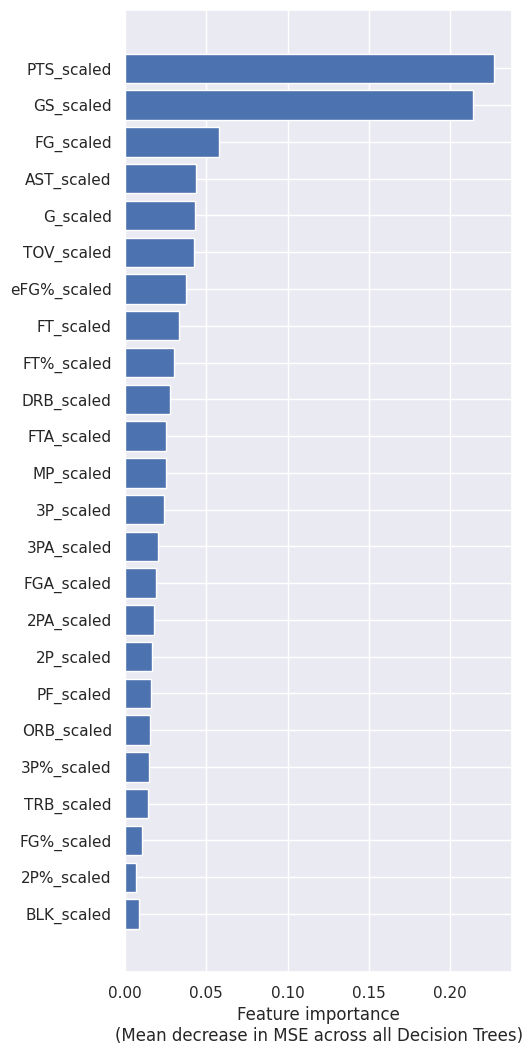

In [ ]:
from sklearn.metrics import r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import KFold
import numpy as np

# number of decision trees in the forest
n_estimators = 100
rf_reg = RandomForestRegressor(n_estimators=n_estimators)

mvp_normalized_data = mvp_normalized_data.fillna(0)

#x values
x_feat_list = ['G_scaled', 'GS_scaled', 'MP_scaled',
       'FG_scaled', 'FGA_scaled', 'FG%_scaled', '3P_scaled', '3PA_scaled',
       '3P%_scaled', '2P_scaled', '2PA_scaled', '2P%_scaled', 'eFG%_scaled',
       'FT_scaled', 'FTA_scaled', 'FT%_scaled', 'ORB_scaled', 'DRB_scaled',
       'TRB_scaled', 'AST_scaled', 'BLK_scaled', 'BLK_scaled', 'TOV_scaled',
       'PF_scaled', 'PTS_scaled']

x = mvp_normalized_data.loc[:, x_feat_list].values

# get the true y values
y = mvp_normalized_data.loc[:, 'Sixth Man'].values

# fit random forest to data
rf_reg.fit(x,y)

# set and use plot_feat_import to plot the bar graph of feature importances
sns.set()
plot_feat_import(x_feat_list, rf_reg.feature_importances_)

# Un-normalize


In [ ]:
import pandas as pd
year_list = ['1992', '1993', '1994', '1995', '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004',
        '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022']

mvp_1992_to_2022_data = pd.DataFrame()
import time

for year in year_list:
    print(year)
    #get table for each year
    url = f'https://www.basketball-reference.com/leagues/NBA_{year}_per_game.html'
    tables = pd.read_html(url)
    df_year = tables[0]

    #drop 'breaks' in table that appear for some reason
    for idx in range(len(df_year)):
        if df_year.loc[idx, 'Player'] == 'Player':
            df_year.drop(labels=idx, axis=0, inplace=True)
        else:
            pass

    #need to drop ranking and position
    df_year.drop(labels='Rk',axis=1, inplace=True)
    df_year.drop(labels='Pos',axis=1, inplace=True)

    #stats that need to be turned into floats or ints
    numerics = ['G', 'GS', 'MP', 'FG', 'FGA', 'FG%',
       '3P', '3PA', '3P%', '2P', '2PA', '2P%', 'eFG%', 'FT', 'FTA', 'FT%',
       'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS']
    for col in numerics:
        df_year[col] = pd.to_numeric(df_year[col])

    #account for shortened seasons
    if year == '1999':
      df_games = df_year.loc[:, 'G']
      s_bool = df_games >= 36

      df_year_cond = df_year.loc[s_bool, :]

    elif year == '2012':
      df_games = df_year.loc[:, 'G']
      s_bool = df_games >= 39

      df_year_cond = df_year.loc[s_bool, :]

    elif year == '2020':
      df_games = df_year.loc[:, 'G']
      s_bool = df_games >= 50

      df_year_cond = df_year.loc[s_bool, :]

    elif year == '2021':
      df_games = df_year.loc[:, 'G']
      s_bool = df_games >= 52

      df_year_cond = df_year.loc[s_bool, :]

    #every other year need 60 games to qualify
    else:
        df_games = df_year.loc[:, 'G']
        s_bool = df_games >= 60

        df_year_cond = df_year.loc[s_bool, :]


    #add year column
    df_year_cond['Year'] = year

    #if this is first year, then set equal to dataframe, if not, add to bottom
    if len(mvp_1992_to_2022_data) == 0:
        mvp_1992_to_2022_data = df_year_cond

    else:
        mvp_1992_to_2022_data = pd.concat([mvp_1992_to_2022_data, df_year_cond], axis=0)

    time.sleep(10)


1992


<ipython-input-14-a6603e0172a4>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_year_cond['Year'] = year


1993


<ipython-input-14-a6603e0172a4>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_year_cond['Year'] = year


1994


<ipython-input-14-a6603e0172a4>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_year_cond['Year'] = year


1995


<ipython-input-14-a6603e0172a4>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_year_cond['Year'] = year


1996


<ipython-input-14-a6603e0172a4>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_year_cond['Year'] = year


1997


<ipython-input-14-a6603e0172a4>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_year_cond['Year'] = year


1998


<ipython-input-14-a6603e0172a4>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_year_cond['Year'] = year


1999


<ipython-input-14-a6603e0172a4>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_year_cond['Year'] = year


2000


<ipython-input-14-a6603e0172a4>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_year_cond['Year'] = year


2001


<ipython-input-14-a6603e0172a4>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_year_cond['Year'] = year


2002


<ipython-input-14-a6603e0172a4>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_year_cond['Year'] = year


2003


<ipython-input-14-a6603e0172a4>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_year_cond['Year'] = year


2004


<ipython-input-14-a6603e0172a4>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_year_cond['Year'] = year


2005


<ipython-input-14-a6603e0172a4>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_year_cond['Year'] = year


2006


<ipython-input-14-a6603e0172a4>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_year_cond['Year'] = year


2007


<ipython-input-14-a6603e0172a4>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_year_cond['Year'] = year


2008


<ipython-input-14-a6603e0172a4>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_year_cond['Year'] = year


2009


<ipython-input-14-a6603e0172a4>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_year_cond['Year'] = year


2010


<ipython-input-14-a6603e0172a4>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_year_cond['Year'] = year


2011


<ipython-input-14-a6603e0172a4>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_year_cond['Year'] = year


2012


<ipython-input-14-a6603e0172a4>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_year_cond['Year'] = year


2013


<ipython-input-14-a6603e0172a4>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_year_cond['Year'] = year


2014


<ipython-input-14-a6603e0172a4>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_year_cond['Year'] = year


2015


<ipython-input-14-a6603e0172a4>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_year_cond['Year'] = year


2016


<ipython-input-14-a6603e0172a4>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_year_cond['Year'] = year


2017


<ipython-input-14-a6603e0172a4>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_year_cond['Year'] = year


2018


<ipython-input-14-a6603e0172a4>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_year_cond['Year'] = year


2019


<ipython-input-14-a6603e0172a4>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_year_cond['Year'] = year


2020


<ipython-input-14-a6603e0172a4>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_year_cond['Year'] = year


2021


<ipython-input-14-a6603e0172a4>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_year_cond['Year'] = year


2022


<ipython-input-14-a6603e0172a4>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_year_cond['Year'] = year


In [ ]:
#export to csv
mvp_1992_to_2022_data.to_csv('30 Years Non-Normalized.csv')

# Decision Tree


In [ ]:
#build regressor
from sklearn.tree import DecisionTreeRegressor

#set features
x_feat_list = ['PTS_scaled', 'AST_scaled', 'STL_scaled', 'BLK_scaled', 'TOV_scaled', 'FG%_scaled', 'FT%_scaled', 'ORB_scaled', 'DRB_scaled', '3P%_scaled']
x = mvp_normalized_data.loc[:, x_feat_list].values

y_feat = 'MVP'

#set max depth
max_depth = 2

#get variables
x = mvp_normalized_data.loc[:, x_feat_list].values
y = mvp_normalized_data.loc[:, y_feat].values

#initialize regressor
reg = DecisionTreeRegressor(max_depth = max_depth)
reg.fit(x, y)

DecisionTreeRegressor(max_depth=2)

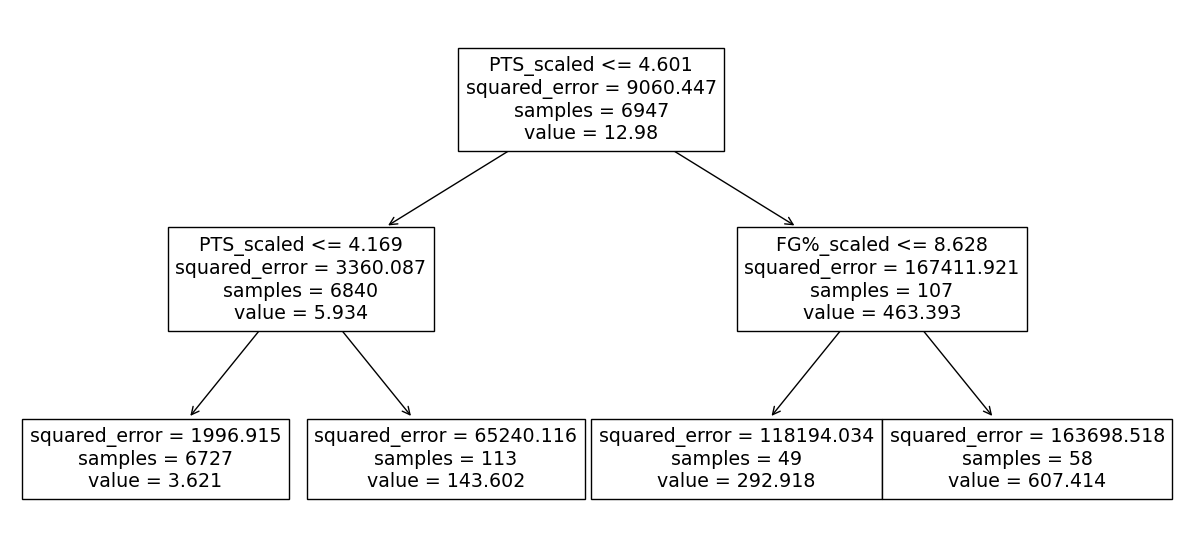

In [ ]:
#plot decision tree
import seaborn as sns
from sklearn import tree
import matplotlib.pyplot as plt

plt.figure()
plt.gcf().set_size_inches(15, 7)

# 'plot' decision tree
tree.plot_tree(reg, feature_names=x_feat_list);

While our overall topic is fairly free of larger world consequences, there are some ethical implications of using a machine learning model to predict NBA end of season awards. Firstly, there is always a risk of bias, and a model based on past awards can further perpetuate existing biases. Furthermore, there has to be a transparecy of how the model works so that it doesn't immediately lead to mistrust of the system (such as what happened with the NBA Draft Lottery). Most prominently, many top NBA players' contracts and salaries are dependent upon the honors they recieve: if the model causes them to miss out on awards repeatedly, players stand to lose millions of dollars, and potentially even motivation for playing at high levels. It could change the way both players and organizations approach the regular season and cause play style changes across the league.